## Data Reading and Understanding

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pathlib
import glob as gb
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [10]:
train_df = pd.read_csv('archive/train/_annotations.csv')
test_df = pd.read_csv('archive/test/_annotations.csv')
val_df = pd.read_csv('archive/valid/_annotations.csv')

In [56]:
train_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,nile-fish-7-_jpg.rf.31e4278980878c47a1e6a2f8dd...,640,640,Nile_Fish,375,319,512,454
1,Her-8-_jpg.rf.32bcf63f4ae4d6aea53cea5b9c0059b4...,640,640,Her,211,247,368,339
2,composite_bow-34-_jpg.rf.33153e63f7158777c50d4...,640,640,Composite_Bow,158,183,336,282
3,snake-6-_jpg.rf.32ac52ece4bcc06b1ead936693df17...,640,640,Snake,181,351,318,506
4,king-26-_jpg.rf.329a5a8e366f4fe2e3a3dca88524cc...,640,640,King,218,290,339,524


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2723 non-null   object
 1   width     2723 non-null   int64 
 2   height    2723 non-null   int64 
 3   class     2723 non-null   object
 4   xmin      2723 non-null   int64 
 5   ymin      2723 non-null   int64 
 6   xmax      2723 non-null   int64 
 7   ymax      2723 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 170.3+ KB


In [58]:
train_df.shape, val_df.shape, test_df.shape

((2723, 8), (778, 8), (389, 8))

In [59]:
train_df = train_df[['filename','class']]
test_df = test_df[['filename','class']]
val_df = val_df[['filename','class']]
train_df.head()

,filename,class
0,nile-fish-7-_jpg.rf.31e4278980878c47a1e6a2f8dd...,Nile_Fish
1,Her-8-_jpg.rf.32bcf63f4ae4d6aea53cea5b9c0059b4...,Her
2,composite_bow-34-_jpg.rf.33153e63f7158777c50d4...,Composite_Bow
3,snake-6-_jpg.rf.32ac52ece4bcc06b1ead936693df17...,Snake
4,king-26-_jpg.rf.329a5a8e366f4fe2e3a3dca88524cc...,King


Text(0.5, 1.0, 'Class Distribution')

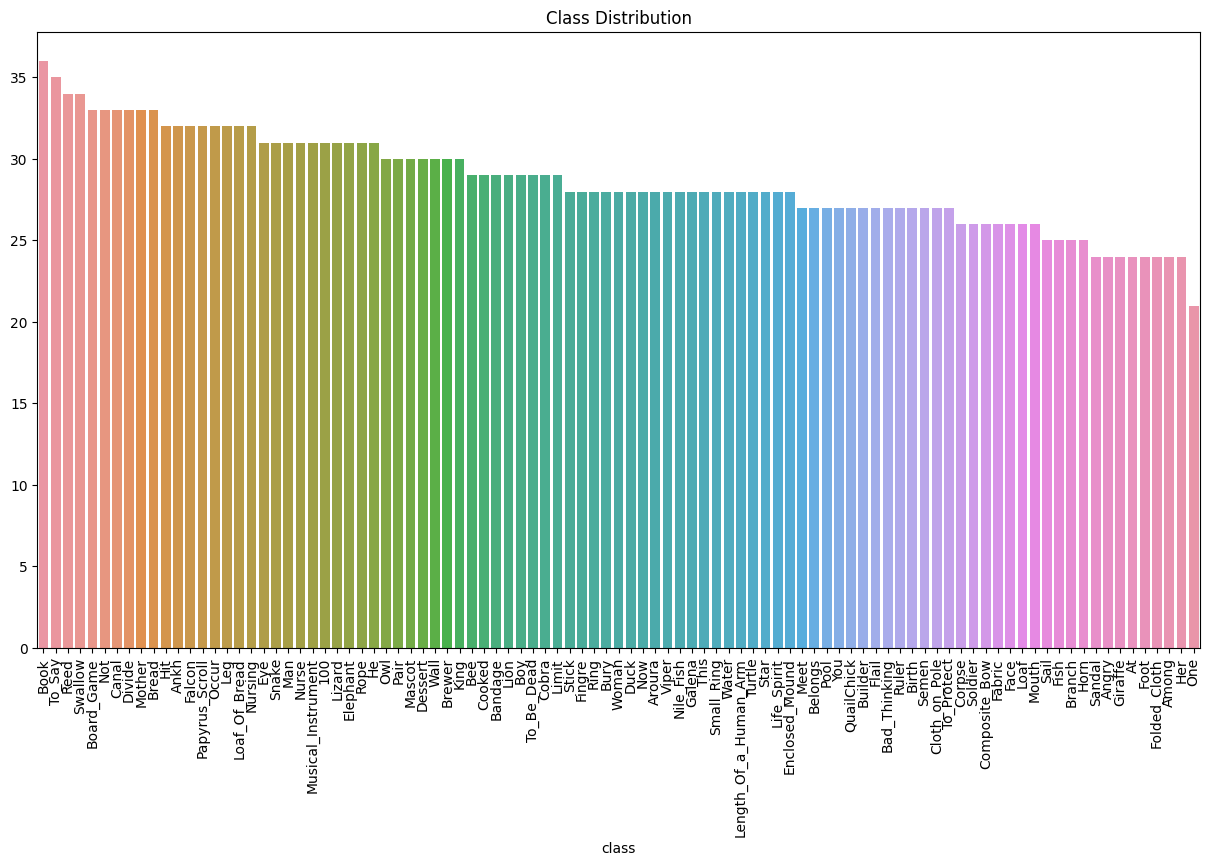

In [60]:
class_counts = train_df['class'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.title('Class Distribution')

* no data imbalance

# Data Augmentation and visualization

In [64]:
train_folder = '/kaggle/input/egyptian-hieroglyphs/train'

train_datagen =ImageDataGenerator(
                                rotation_range=50,
                                zoom_range=0.2,
                                rescale=1/255.0,
                                preprocessing_function=None,
               ).flow_from_dataframe(
                                dataframe=train_df,
                                directory=train_folder,
                                x_col="filename",
                                y_col="class",
                                class_mode="categorical",
                                batch_size=64,
                                shuffle=True,
                                color_mode='rgb',
                                target_size=(224, 224),
                                seed=0,)

Found 2723 validated image filenames belonging to 95 classes.


In [65]:
train_datagen.class_indices

{'100': 0,
 'Among': 1,
 'Angry': 2,
 'Ankh': 3,
 'Aroura': 4,
 'At': 5,
 'Bad_Thinking': 6,
 'Bandage': 7,
 'Bee': 8,
 'Belongs': 9,
 'Birth': 10,
 'Board_Game': 11,
 'Book': 12,
 'Boy': 13,
 'Branch': 14,
 'Bread': 15,
 'Brewer': 16,
 'Builder': 17,
 'Bury': 18,
 'Canal': 19,
 'Cloth_on_Pole': 20,
 'Cobra': 21,
 'Composite_Bow': 22,
 'Cooked': 23,
 'Corpse': 24,
 'Dessert': 25,
 'Divide': 26,
 'Duck': 27,
 'Elephant': 28,
 'Enclosed_Mound': 29,
 'Eye': 30,
 'Fabric': 31,
 'Face': 32,
 'Falcon': 33,
 'Fingre': 34,
 'Fish': 35,
 'Flail': 36,
 'Folded_Cloth': 37,
 'Foot': 38,
 'Galena': 39,
 'Giraffe': 40,
 'He': 41,
 'Her': 42,
 'Hit': 43,
 'Horn': 44,
 'King': 45,
 'Leg': 46,
 'Length_Of_a_Human_Arm': 47,
 'Life_Spirit': 48,
 'Limit': 49,
 'Lion': 50,
 'Lizard': 51,
 'Loaf': 52,
 'Loaf_Of_Bread': 53,
 'Man': 54,
 'Mascot': 55,
 'Meet': 56,
 'Mother': 57,
 'Mouth': 58,
 'Musical_Instrument': 59,
 'Nile_Fish': 60,
 'Not': 61,
 'Now': 62,
 'Nurse': 63,
 'Nursing': 64,
 'Occur': 65,
 'One

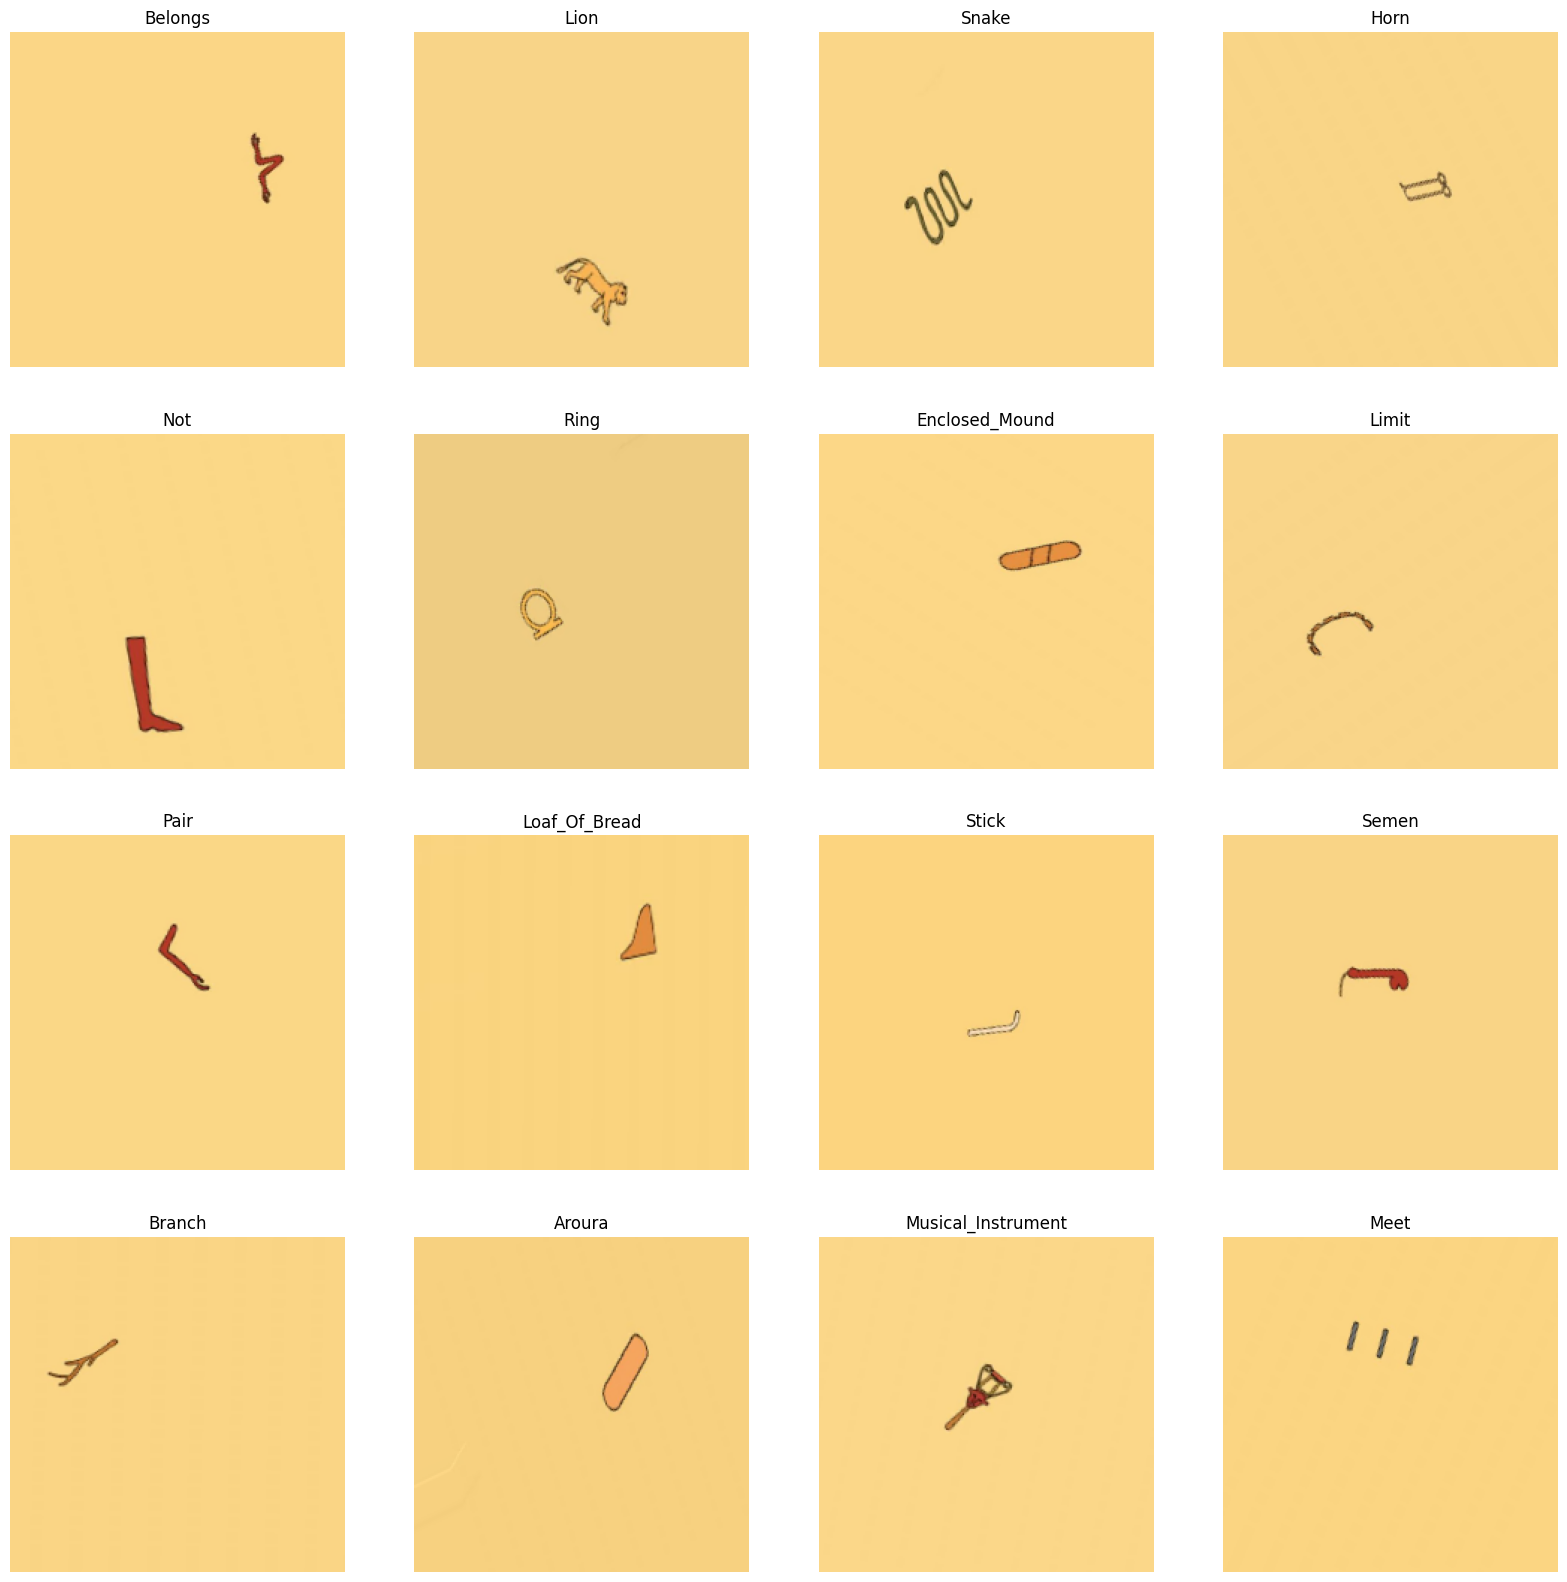

In [66]:
labels=list(train_datagen.class_indices.keys())

plt.figure(figsize=(20,20))
for X_batch, y_batch in train_datagen:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(labels[np.where(y_batch[i]==1)[0][0]])
        plt.axis('off')
        plt.grid(None)
    plt.show()
    break

In [67]:
valid_folder = '/kaggle/input/egyptian-hieroglyphs/valid/'

valid_datagen =ImageDataGenerator(
                                rotation_range=50,
                                zoom_range=0.2,
                                rescale=1/255.0,
                                preprocessing_function=None,
               ).flow_from_dataframe(
                                dataframe=val_df,
                                directory=valid_folder,
                                x_col="filename",
                                y_col="class",
                                class_mode="categorical",
                                batch_size=64,
                                shuffle=True,
                                color_mode='rgb',
                                target_size=(224, 224),
                                seed=0,)

Found 778 validated image filenames belonging to 95 classes.


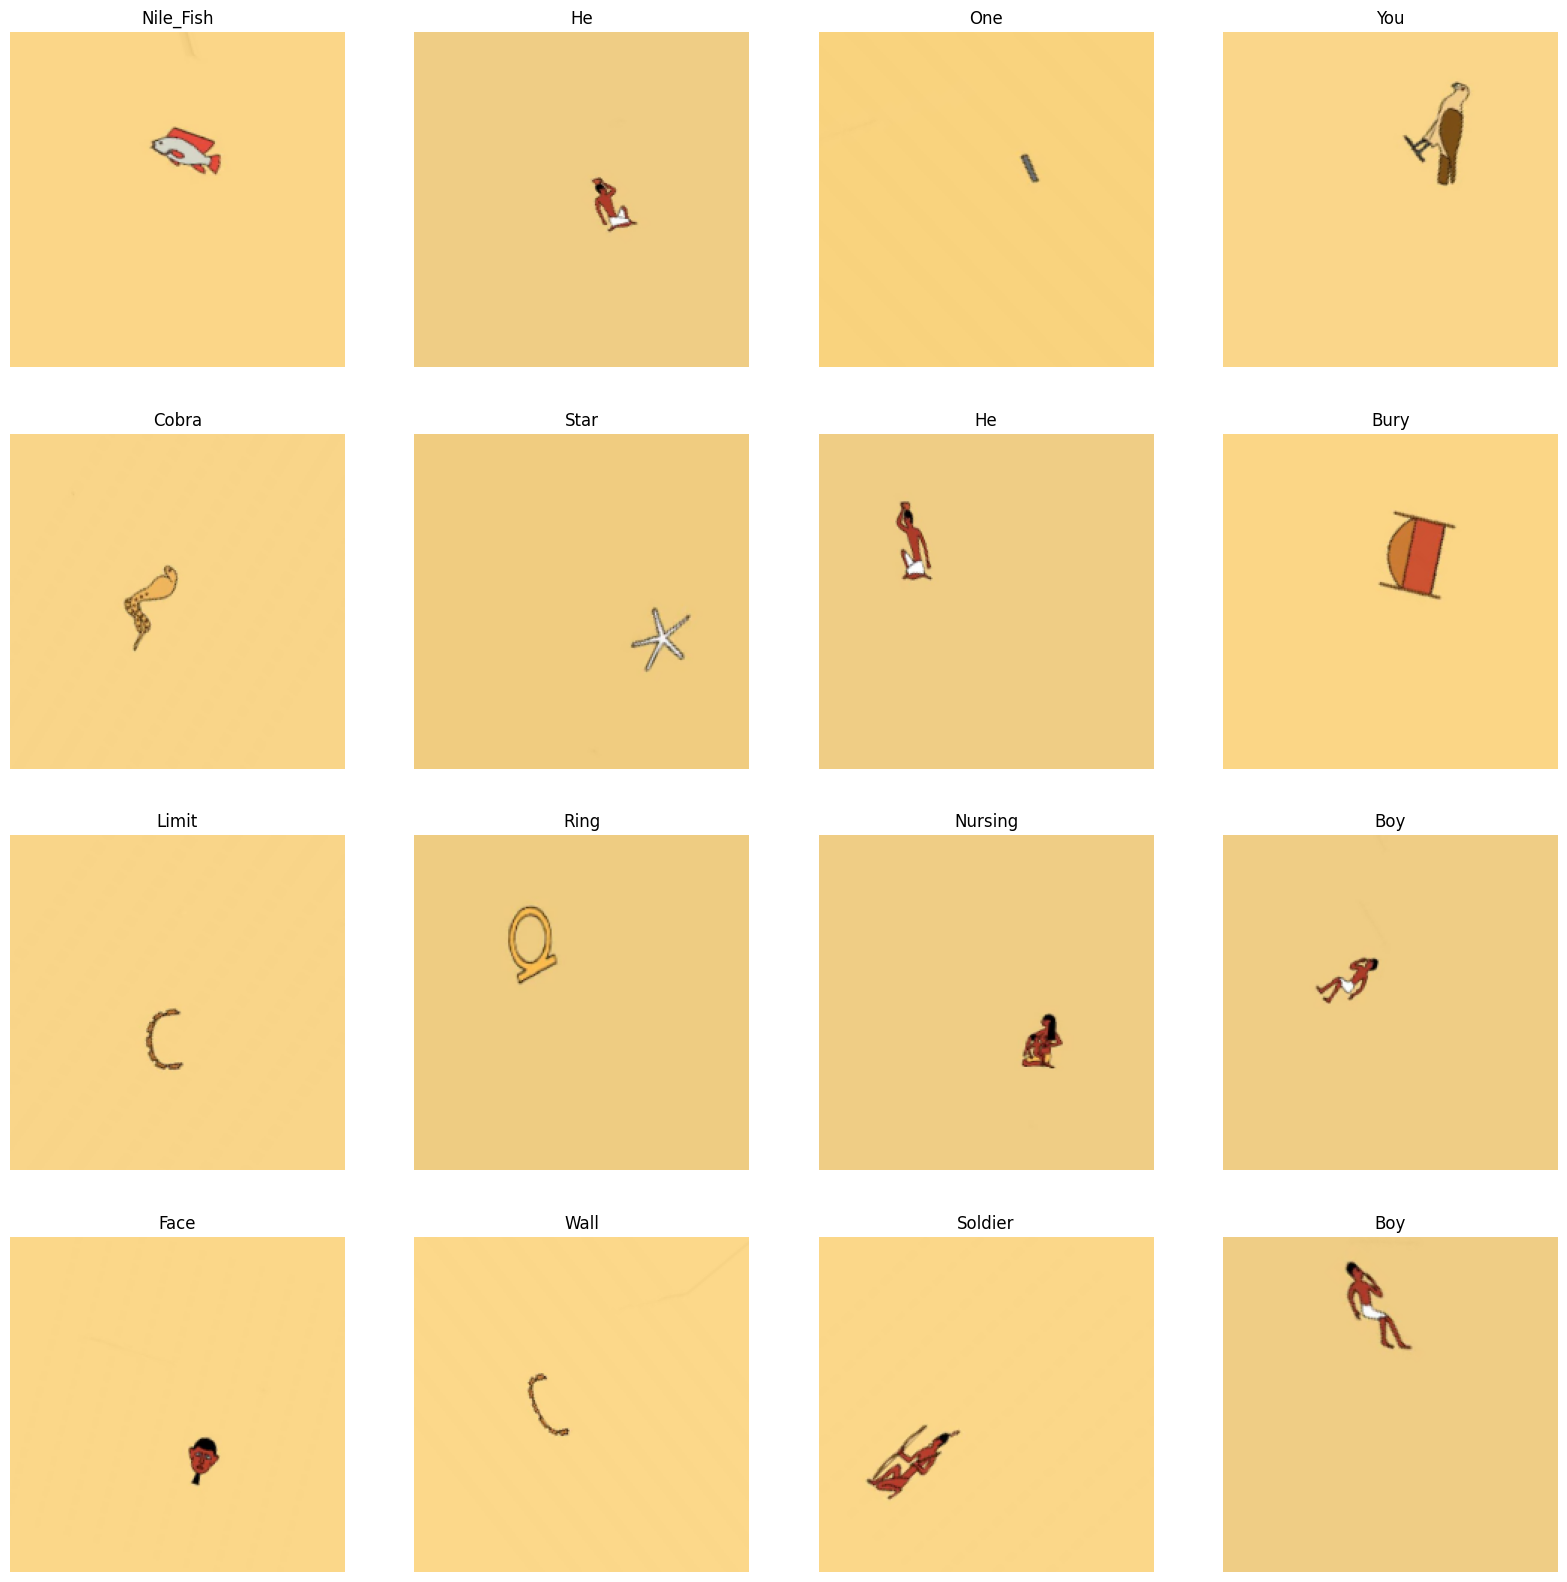

In [68]:
labels=list(valid_datagen.class_indices.keys())

plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_datagen:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(labels[np.where(y_batch[i]==1)[0][0]])
        plt.axis('off')
        plt.grid(None)
    plt.show()
    break

In [69]:
test_folder = '/kaggle/input/egyptian-hieroglyphs/test/'

test_datagen =ImageDataGenerator(
                                rotation_range=50,
                                zoom_range=0.2,
                                rescale=1/255.0,
                                preprocessing_function=None,
               ).flow_from_dataframe(
                                dataframe=test_df,
                                directory=test_folder,
                                x_col="filename",
                                y_col="class",
                                class_mode="categorical",
                                batch_size=64,
                                shuffle=True,
                                color_mode='rgb',
                                target_size=(224, 224),
                                seed=0,)

Found 389 validated image filenames belonging to 94 classes.


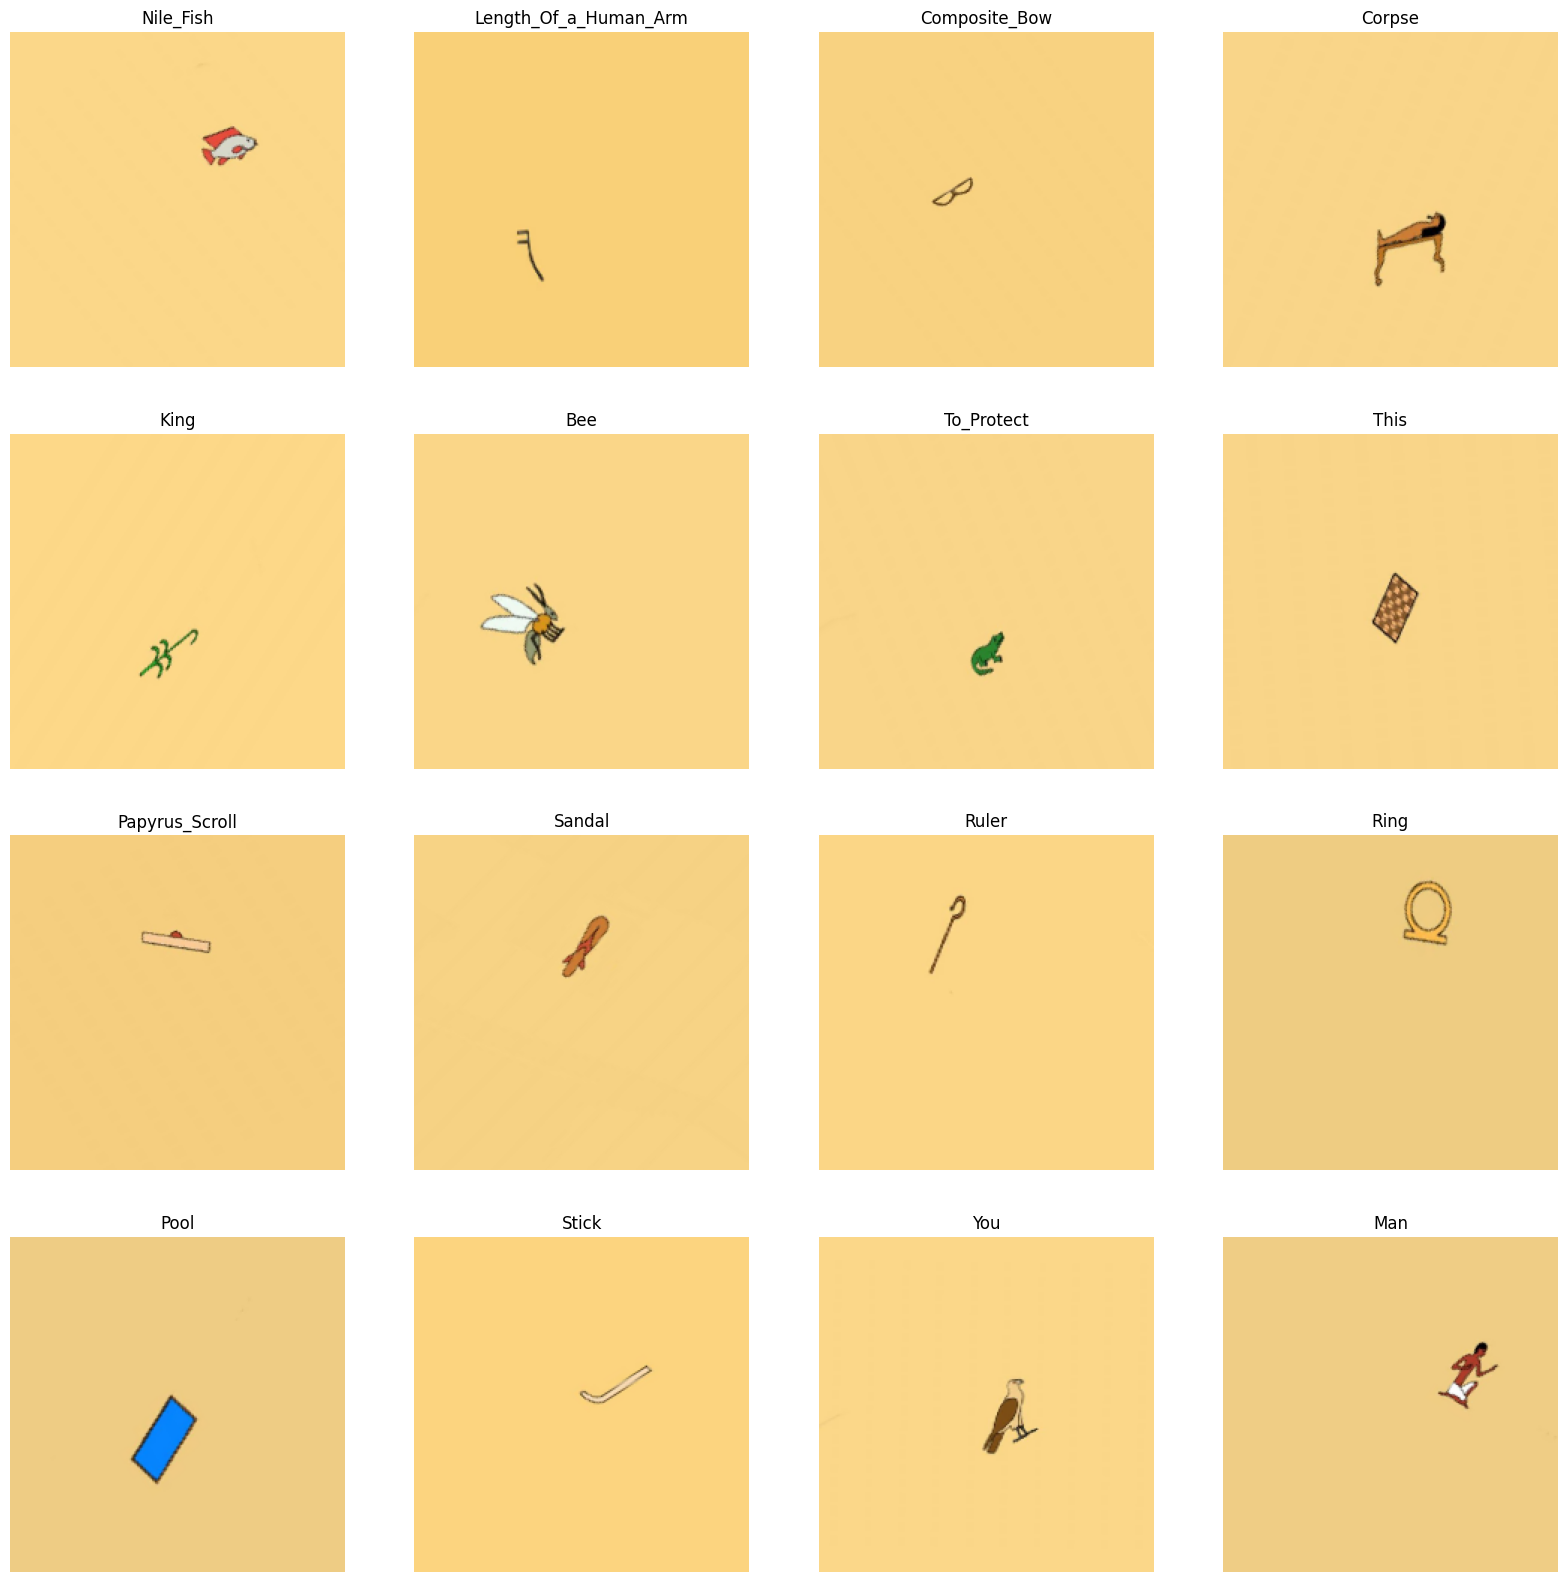

In [70]:
labels=list(test_datagen.class_indices.keys())

plt.figure(figsize=(20,20))
for X_batch, y_batch in test_datagen:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(labels[np.where(y_batch[i]==1)[0][0]])
        plt.axis('off')
        plt.grid(None)
    plt.show()
    break

# Modeling: 1- VGG16

In [71]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

img_size = [224, 224] 
vgg = VGG16(input_shape=img_size + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

output_layer = Dense(95, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=output_layer)

In [72]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 95)             │         6,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,794,783 (56.44 MB)

 Trainable params: 80,095 (312.87 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [73]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
callbacks = early_stopping

In [74]:
history = model.fit(train_datagen,
                        validation_data=valid_datagen,
                        epochs = 50,
                        callbacks = callbacks
                        )

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.0101 - loss: 4.5749 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0347 - val_loss: 4.5277 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 964ms/step - accuracy: 0.0287 - loss: 4.5142 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0334 - val_loss: 4.4615 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 959ms/step - accuracy: 0.0555 - loss: 4.4131 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0733 - val_loss: 4.2692 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 48s 973ms/step - accuracy: 0.1031 - loss: 4.1653 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1272 - val_loss: 3.8478 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 967ms/step - accuracy: 0.1656 - loss: 3.6358 - precis

# 2- ResNet50

In [75]:
from keras.applications import ResNet50, InceptionV3 , MobileNetV2

In [76]:
img_size = [299, 299]
resnet = ResNet50(input_shape=img_size + [3], weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

x_resnet = resnet.output
x_resnet = GlobalAveragePooling2D()(x_resnet)
x_resnet = Dense(128, activation='relu')(x_resnet)
x_resnet = Dense(64, activation='relu')(x_resnet)

output_resnet = Dense(95, activation='softmax')(x_resnet)

resnet_model = Model(inputs=resnet.input, outputs=output_resnet)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [77]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                     loss='categorical_crossentropy',
                     metrics=['accuracy', 'precision', 'recall'])

In [78]:
history_resnet = resnet_model.fit(train_datagen,
                        validation_data=valid_datagen,
                        epochs = 15,
                        callbacks = callbacks
                        )

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.0127 - loss: 4.5920 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0077 - val_loss: 4.5571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 46s 930ms/step - accuracy: 0.0090 - loss: 4.5545 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0064 - val_loss: 4.5563 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 925ms/step - accuracy: 0.0084 - loss: 4.5540 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0051 - val_loss: 4.5569 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 46s 927ms/step - accuracy: 0.0147 - loss: 4.5538 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0051 - val_loss: 4.5567 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 926ms/step - accuracy: 0.0134 - loss: 4.5525 - precis

# 3- InceptionV3

In [79]:
inception = InceptionV3(input_shape=img_size + [3], weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

x_inception = inception.output
x_inception = GlobalAveragePooling2D()(x_inception)
x_inception = Dense(128, activation='relu')(x_inception)
x_inception = Dense(64, activation='relu')(x_inception)
output_inception = Dense(95, activation='softmax')(x_inception)

inception_model = Model(inputs=inception.input, outputs=output_inception)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [80]:
inception_model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                        loss='categorical_crossentropy',
                        metrics=['accuracy', 'precision', 'recall'])
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [81]:
history_inception = inception_model.fit(train_datagen,
                        validation_data=valid_datagen,
                        epochs = 32,
                        callbacks = callbacks
                        )

Epoch 1/32
43/43 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.0729 - loss: 4.3233 - precision: 0.4270 - recall: 0.0026 - val_accuracy: 0.3175 - val_loss: 3.0542 - val_precision: 0.8400 - val_recall: 0.0270
Epoch 2/32
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 909ms/step - accuracy: 0.4912 - loss: 2.3833 - precision: 0.8761 - recall: 0.1013 - val_accuracy: 0.7558 - val_loss: 1.1135 - val_precision: 0.9272 - val_recall: 0.4254
Epoch 3/32
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 926ms/step - accuracy: 0.8107 - loss: 0.8515 - precision: 0.9272 - recall: 0.5494 - val_accuracy: 0.8689 - val_loss: 0.5808 - val_precision: 0.9471 - val_recall: 0.7365
Epoch 4/32
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 925ms/step - accuracy: 0.8789 - loss: 0.4848 - precision: 0.9414 - recall: 0.7682 - val_accuracy: 0.8907 - val_loss: 0.4229 - val_precision: 0.9272 - val_recall: 0.8021
Epoch 5/32
43/43 ━━━━━━━━━━━━━━━━━━━━ 46s 933ms/step - accuracy: 0.9081 - loss: 0.3483 - precision: 0.9445 - recall: 0.8465 - val_accuracy: 0.9075 - val_loss: 

# 4- MobileNetV2

In [82]:
mobilenet = MobileNetV2(input_shape=img_size + [3], weights='imagenet', include_top=False)

for layer in mobilenet.layers:
    layer.trainable = False

x_mobilenet = mobilenet.output
x_mobilenet = GlobalAveragePooling2D()(x_mobilenet)
x_mobilenet = Dense(128, activation='relu')(x_mobilenet)
x_mobilenet = Dense(64, activation='relu')(x_mobilenet)
output_mobilenet = Dense(95, activation='softmax')(x_mobilenet)

mobilenet_model = Model(inputs=mobilenet.input, outputs=output_mobilenet)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [83]:
mobilenet_model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                        loss='categorical_crossentropy',
                        metrics=['accuracy', 'precision', 'recall'])

In [ ]:
history_mobilenet = mobilenet_model.fit(train_datagen,
                                         validation_data=valid_datagen,
                                         epochs=20,
                                         callbacks=[early_stopping])

In [85]:
#saving the models for future usage
model.save('/kaggle/working/vgg16_model.h5')
resnet_model.save('/kaggle/working/resnet50_model.h5')
inception_model.save('/kaggle/working/inceptionv3_model.h5')
mobilenet_model.save('/kaggle/working/mobilenetv2_model.h5')

# Model Evaluation and Selecting best model

In [18]:
images_train = []
target_size = (224, 224)

for i in train_df['filename']:
    img = cv2.imread(f'archive/train/{i}')
    img_resized = cv2.resize(img, target_size)
    images_train.append(img_resized)

images_val = []
for i in val_df['filename']:
    img=cv2.imread(f'archive/valid/{i}')
    img_resized = cv2.resize(img, target_size)
    images_val.append(img)

images_test = []
for i in test_df['filename']:
    img=cv2.imread(f'archive/test/{i}')
    img_resized = cv2.resize(img, target_size)
    images_test.append(img)

In [5]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np


vgg_model = load_model('vgg16_model.h5')
resnet_model = load_model('resnet50_model.h5')
inception_model = load_model('inceptionv3_model.h5')
mobilenet_model = load_model('mobilenetv2_model.h5')

In [19]:
from sklearn.preprocessing import LabelEncoder

def evaluate_model(model, X, y_true):
    y_pred = np.argmax(model.predict(X), axis=1)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall

label=LabelEncoder()
target_train=label.fit_transform(train_df['class'])
target_val=label.fit_transform(val_df['class'])
target_test=label.fit_transform(test_df['class'])

In [25]:
vgg_metrics = evaluate_model(vgg_model, np.array(images_val), np.array(target_val))
resnet_metrics = evaluate_model(resnet_model, np.array(images_val), np.array(target_val))
inception_metrics = evaluate_model(inception_model,np.array(images_val), np.array(target_val))
mobilenet_metrics = evaluate_model(mobilenet_model, np.array(images_val), np.array(target_val))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1216s 49s/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 405s 16s/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 292s 12s/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step


In [32]:
model_metrics = {
    'Model': ['Inception','VGG','ResNet','MobileNet'],
    'test accuracy': [inception_metrics[0],vgg_metrics[0],resnet_metrics[0],mobilenet_metrics[0]],
    'test precision': [inception_metrics[1],vgg_metrics[1],resnet_metrics[1],mobilenet_metrics[1]],
    'test recall': [inception_metrics[2],vgg_metrics[2],resnet_metrics[2],mobilenet_metrics[2]]
}

evaluation_table = pd.DataFrame(model_metrics)
evaluation_table

,Model,Test Accuracy,Test Precision,Test Recall
0,Inception,0.97230,0.963800,0.96440
1,VGG,0.94210,0.959800,0.91580
2,ResNet,0.01645,0.000442,0.01542
3,MobileNet,0.97790,0.979500,0.97590
